In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

In [ ]:
dados_br = pd.read_csv('/content/Producao.csv', encoding = "utf = 8", skiprows = 0, sep = ";", on_bad_lines = 'skip')

In [ ]:
dados_br.head(15)

,id,control,produto,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,...,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429
1,2,vm_Tinto,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,...,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
2,3,vm_Branco,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,...,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
3,4,vm_Rosado,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,...,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
4,5,VINHO FINO DE MESA (VINIFERA),VINHO FINO DE MESA (VINIFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,...,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556
5,6,vv_Tinto,Tinto,7591557,7265666,6782837,3419625,10047658,14731106,12405154,...,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918,23615783
6,7,vv_Branco,Branco,15562889,15655709,13289304,7930070,18927471,21933695,19874659,...,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613,20693437
7,8,vv_Rosado,Rosado,744900,664687,1006630,1018715,2668995,2759789,2220777,...,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265,1959336
8,9,SUCO,SUCO,1097771,2296654,3509440,0,0,0,0,...,76723537,87894468,42210389,77161971,65467906,77805352,69261287,100932264,65809079,67045238
9,10,su_Suco de uva simples,Suco de uva integral,1097771,2296654,3509440,0,0,0,0,...,43331223,52233155,31117869,46865626,34367996,50239767,40718523,68038479,35248305,38122173


In [ ]:
colunas_uteis_br = dados_br.select_dtypes(include = np.number).mean().index.tolist()
colunas_uteis_br.insert(0, "produto")
del colunas_uteis_br[1]
colunas_uteis_br[:5]

['produto', '1970', '1971', '1972', '1973']

In [ ]:
dados_br_uteis = dados_br[colunas_uteis_br]
dados_br_uteis.dropna(inplace=True)
dados_br_uteis = dados_br_uteis.set_index("produto")
dados_br_uteis.T.head(9)

<ipython-input-5-0a42563d395f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_br_uteis.dropna(inplace=True)


produto,VINHO DE MESA,Tinto,Branco,Rosado,VINHO FINO DE MESA (VINIFERA),Tinto,Branco,Rosado,SUCO,Suco de uva integral,...,Borra líquida,Borra seca,Vinho Composto,Pisco,Vinho orgânico,Espumante orgânico,Destilado alcoólico simples de bagaceira,Vinho acidificado,Mosto parcialmente fermentado,Outros derivados
1970,217208604,174224052,748400,42236152,23899346,7591557,15562889,744900,1097771,1097771,...,3847673,0,0,0,0,0,0,0,0,0
1971,154264651,121133369,1160500,31970782,23586062,7265666,15655709,664687,2296654,2296654,...,3565644,0,0,0,0,0,0,0,0,0
1972,146953297,118180926,1812367,26960004,21078771,6782837,13289304,1006630,3509440,3509440,...,3015037,0,0,0,0,0,0,0,0,0
1973,116710345,88589019,243900,27877426,12368410,3419625,7930070,1018715,0,0,...,3559922,0,0,0,0,0,0,0,0,0
1974,193875345,146544484,4138768,43192093,31644124,10047658,18927471,2668995,0,0,...,5136979,0,0,0,0,0,0,0,0,0
1975,177401209,144274134,1441507,31685568,39424590,14731106,21933695,2759789,0,0,...,4624839,0,0,0,0,0,0,0,0,0
1976,144565438,118360170,1871473,24333795,34500590,12405154,19874659,2220777,0,0,...,3393173,0,0,0,0,0,0,0,0,0
1977,195359778,154801826,4954387,35603565,41264971,16131758,20409231,4723982,0,0,...,0,0,0,0,0,0,0,0,0,0
1978,200053669,162917363,5079748,32056558,36750933,15000671,17640081,4110181,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

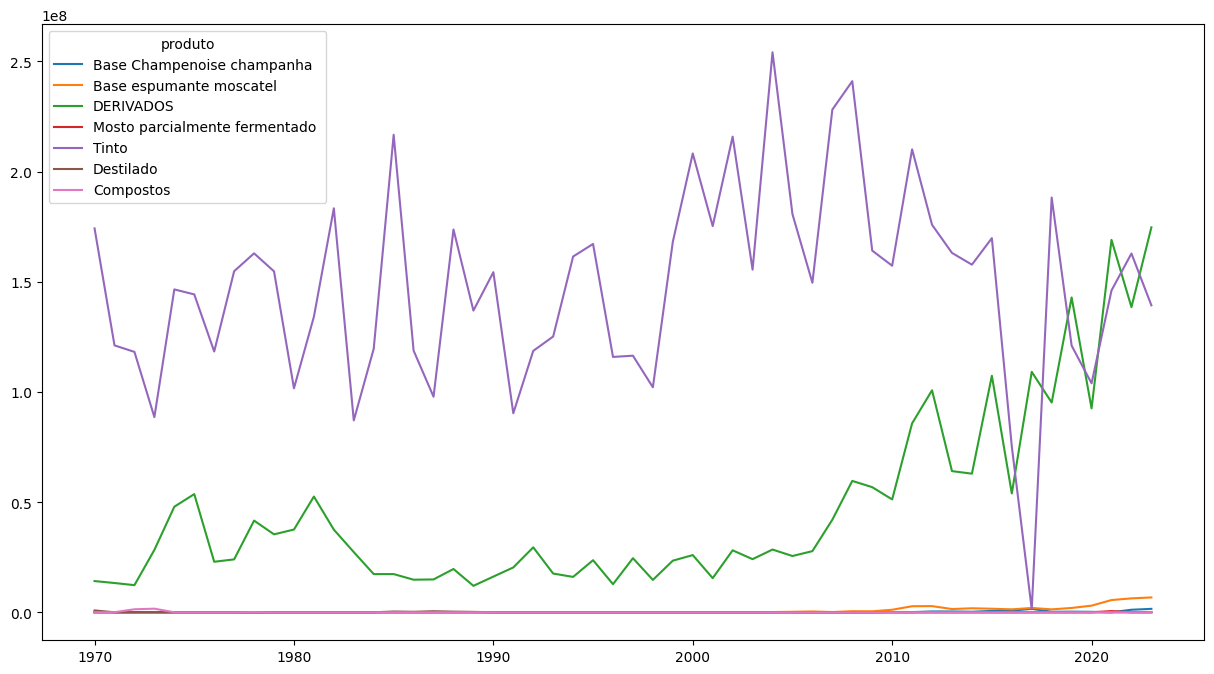

In [ ]:
dados_br_uteis.sample(7).T.plot(figsize = (15,8))

In [ ]:
anual = dados_br_uteis.T
anual.head()

produto,VINHO DE MESA,Tinto,Branco,Rosado,VINHO FINO DE MESA (VINIFERA),Tinto,Branco,Rosado,SUCO,Suco de uva integral,...,Borra líquida,Borra seca,Vinho Composto,Pisco,Vinho orgânico,Espumante orgânico,Destilado alcoólico simples de bagaceira,Vinho acidificado,Mosto parcialmente fermentado,Outros derivados
1970,217208604,174224052,748400,42236152,23899346,7591557,15562889,744900,1097771,1097771,...,3847673,0,0,0,0,0,0,0,0,0
1971,154264651,121133369,1160500,31970782,23586062,7265666,15655709,664687,2296654,2296654,...,3565644,0,0,0,0,0,0,0,0,0
1972,146953297,118180926,1812367,26960004,21078771,6782837,13289304,1006630,3509440,3509440,...,3015037,0,0,0,0,0,0,0,0,0
1973,116710345,88589019,243900,27877426,12368410,3419625,7930070,1018715,0,0,...,3559922,0,0,0,0,0,0,0,0,0
1974,193875345,146544484,4138768,43192093,31644124,10047658,18927471,2668995,0,0,...,5136979,0,0,0,0,0,0,0,0,0


In [ ]:
colunas_filtradas = ['VINHO DE MESA', 'VINHO FINO DE MESA (VINIFERA)', 'SUCO', 'DERIVADOS']
colunas_selecionadas = dados_br_uteis.T[colunas_filtradas]
colunas_selecionadas.head()

produto,VINHO DE MESA,VINHO FINO DE MESA (VINIFERA),SUCO,DERIVADOS
1970,217208604,23899346,1097771,14164329
1971,154264651,23586062,2296654,13280518
1972,146953297,21078771,3509440,12314509
1973,116710345,12368410,0,28317919
1974,193875345,31644124,0,47904934


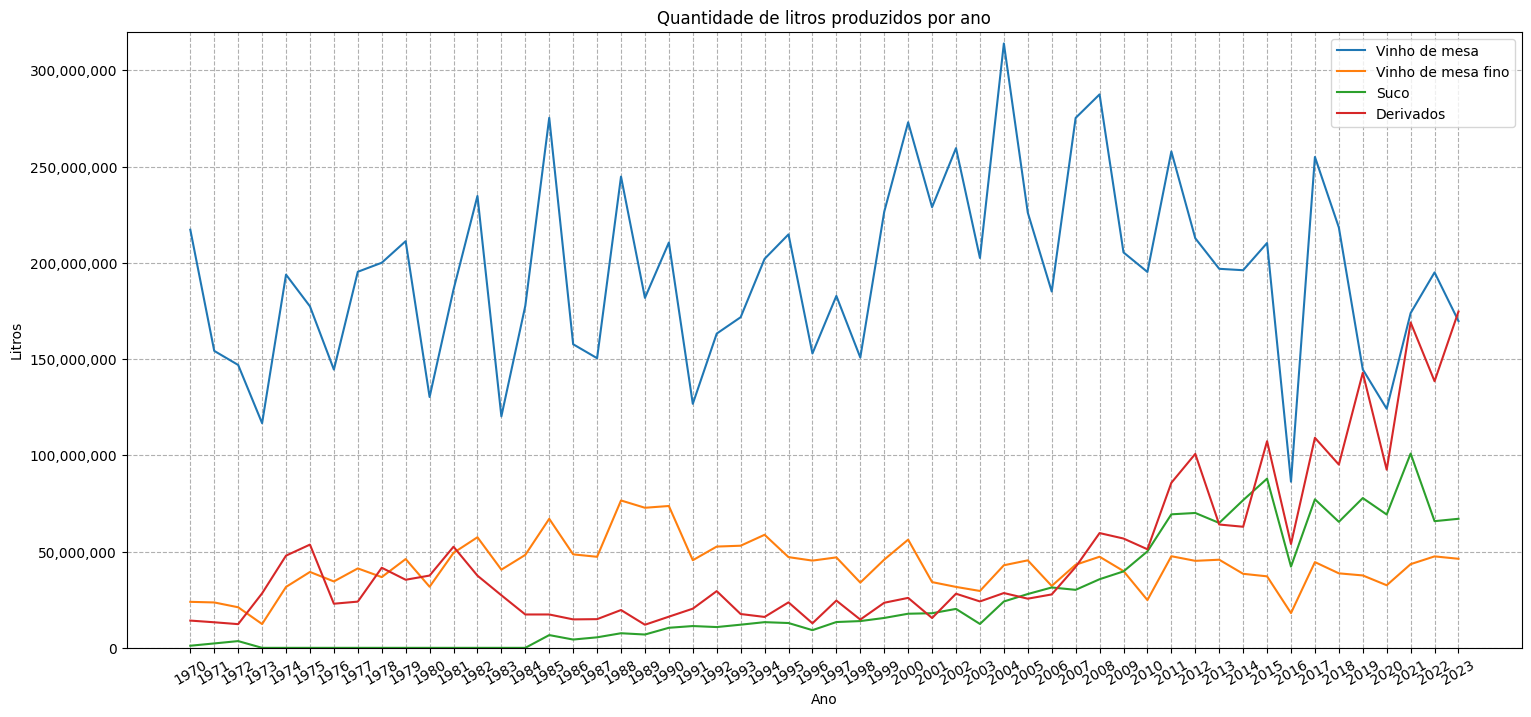

In [ ]:
plt.figure(figsize = (20, 8))
plt.xticks(rotation = 30)
plt.ylim(0, 320000000) ##Litros produzidos
plt.xlabel("Ano")
plt.title("Quantidade de litros produzidos por ano")
plt.grid(linestyle ="--")
axis_anual_vm = sb.lineplot(data = anual, x = anual.index, y = anual["VINHO DE MESA"], label = "Vinho de mesa")
axis_anual_br = sb.lineplot(data = anual, x = anual.index, y = anual["VINHO FINO DE MESA (VINIFERA)"], label = "Vinho de mesa fino")
axis_anual_suco = sb.lineplot(data = anual, x = anual.index, y = anual["SUCO"], label = "Suco")
axis_anual_der = sb.lineplot(data = anual, x = anual.index, y = anual["DERIVADOS"], label = "Derivados")
axis_anual_br.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax = plt.gca()
ax.set_ylabel("Litros")

plt.show()